# Imports

In [85]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras.layers

# Loading Data

In [86]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# Data Visualization

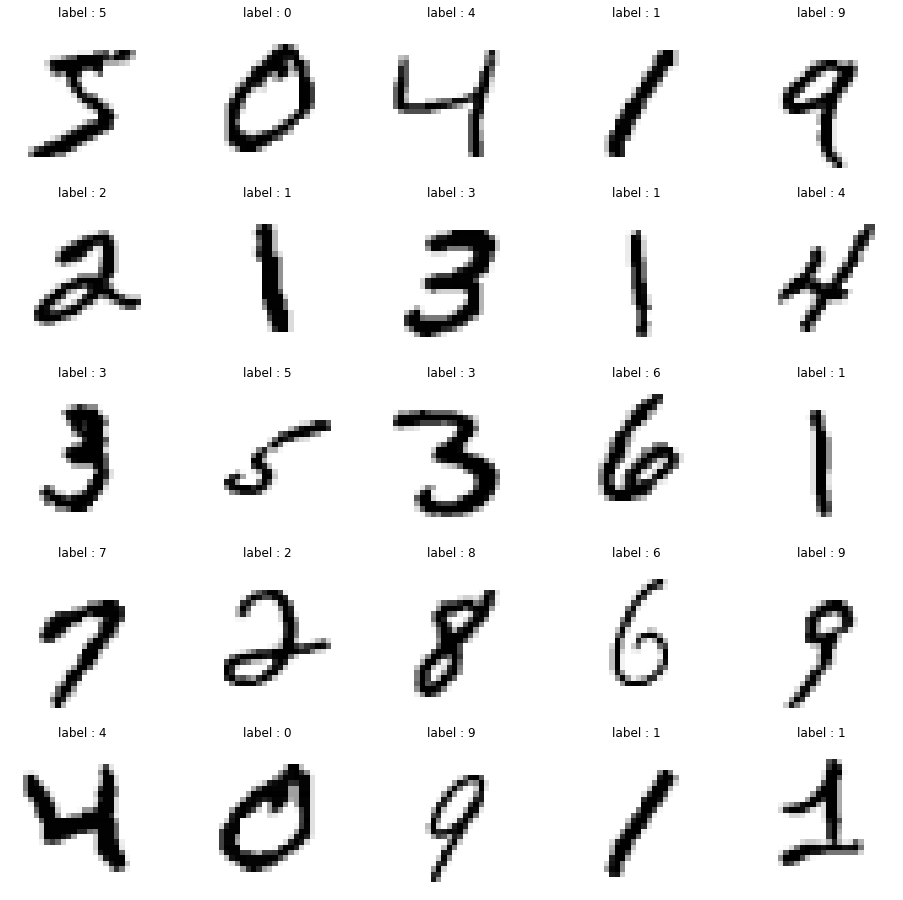

In [87]:
fig, ax = plt.subplots(5, 5, figsize = (16,16))
for i, ax in enumerate(ax.flatten()):
    ax.axis('off')
    ax.set_title(f'label : {y_train[i]}')
    ax.imshow(x_train[i], cmap = 'binary')
plt.show()

# Model Building

In [88]:
input = tensorflow.keras.layers.Input(shape = (28,28))
x = tensorflow.keras.layers.LSTM(64, activation = "relu")(input)
out = tensorflow.keras.layers.Dense(10, activation = "softmax")(x)

model = tf.keras.models.Model(input, out)
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 lstm_7 (LSTM)               (None, 64)                23808     
                                                                 
 dense_12 (Dense)            (None, 10)                650       
                                                                 
Total params: 24,458
Trainable params: 24,458
Non-trainable params: 0
_________________________________________________________________


# Training Model

In [89]:
model.compile(optimizer  ="adam", loss = "sparse_categorical_crossentropy", metrics = ["acc"])
fitted_model = model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4933 - acc: 0.8413
Epoch 2/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1447 - acc: 0.9563
Epoch 3/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1034 - acc: 0.9683
Epoch 4/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0844 - acc: 0.9748
Epoch 5/50
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0699 - acc: 0.9786
Epoch 6/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0600 - acc: 0.9816
Epoch 7/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0526 - acc: 0.9835
Epoch 8/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0469 - acc: 0.9854
Epoch 9/50
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0408 - acc: 0.9868
Epoch 10/50
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0381 - acc: 0.9877
Epoch 11/

# Model Evaluation

In [90]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Loss: {0}, Accuracy: {1}".format(loss, accuracy))

313/313 [==============================] - 2s 6ms/step - loss: 0.0576 - acc: 0.9881
Loss: 0.05758195370435715, Accuracy: 0.988099992275238


# Accuracy Plot

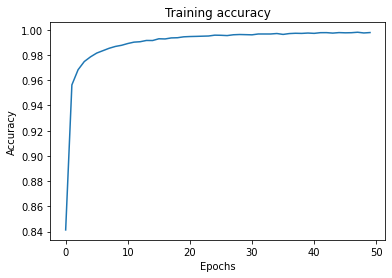

In [91]:
accuracy = fitted_model.history['acc']
epochs = range(0, 50)

plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, accuracy)
plt.show()

# Validation

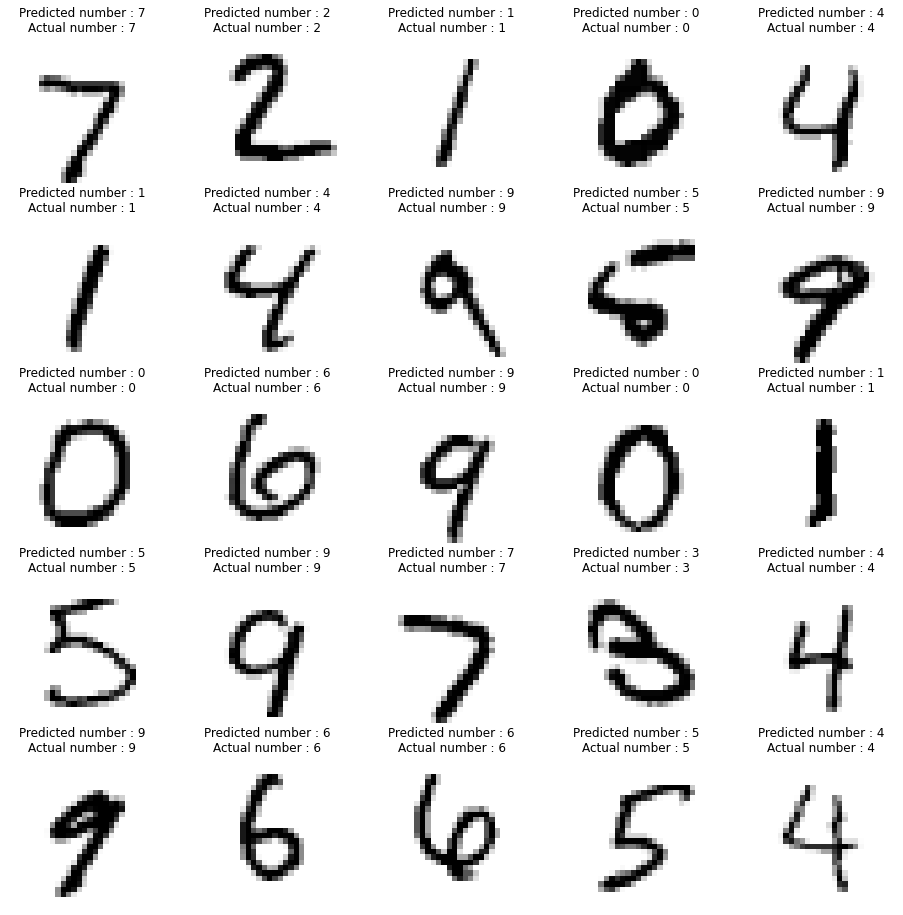

In [92]:
y_pred = model.predict(x_test)

fig, ax = plt.subplots(5, 5, figsize = (16,16))
for i, ax in enumerate(ax.flatten()):
    ax.axis('off')
    ax.set_title(f'Predicted number : {y_pred[i].argmax()}\nActual number : {y_test[i]}')
    ax.imshow(x_test[i], cmap ='binary')
plt.show()